# Car information dataset


Esse conjunto de dados apresenta informações sobre automoveis como seus nomes, ano de fabricação do modelo dos carros, a região de origem de cada um deles, o número de cilindros no motor, verificação de velocidade, cavalos de potência do motor, o peso e outras informações. Uma certa quantidade de carros de diversos modelos estão nesse conjunto de dados.


# Variaveis

* Name: Identificador exclusivo de cada automóvel
* MPG (Milhas por galão): Eficiência de combustível medida em milhas por galão
* Cylinders: Número de cilindros do motor
* Displacement: Cilindrada do motor, indicando seu tamanho ou capacidade
* Horsepower: Potência do motor
* Weight: Peso do automóvel
* Acceleration: Capacidade de aumentar a velocidade, medida em segundos
* Model Year: Ano de fabricação do modelo do automóvel
* Origin : País ou região de origem de cada automóvel

# Banco de dados usado: https://www.kaggle.com/datasets/tawfikelmetwally/automobile-dataset

# Importanto Bibliotecas e Informações sobre o DataFrame

In [377]:
import pandas as pd  # biblioteca para manipulação de dados em formato de tabelas (DataFrames).
import numpy as np  # biblioteca para operações numéricas e arrays.
import matplotlib.pyplot as plt  # biblioteca para criação de gráficos estáticos.
import seaborn as sns  # Biblioteca para gráficos mais estilizados, baseada no matplotlib.
import statsmodels.api as sm  # módulo para análise estatística e modelos de regressão.
from sklearn.model_selection import train_test_split  # função para dividir os dados em conjuntos de treino e teste.
from sklearn.linear_model import LinearRegression  # Modelo de Regressão Linear.
from sklearn.neighbors import KNeighborsRegressor  # Modelo de Regressão com K-Vizinhos Mais Próximos (KNN).
from sklearn.svm import SVR  # modelo de Regressão com Máquinas de Vetores de Suporte (SVR).
from sklearn.ensemble import GradientBoostingRegressor  # modelo de Regressão usando Gradient Boosting (Aprendizado Ensemblado).
from sklearn.tree import DecisionTreeRegressor, plot_tree  # modelo de Regressão com Árvores de Decisão + Função para visualizar a árvore.
from sklearn.ensemble import RandomForestRegressor  # Modelo de Regressão usando Random Forest (Floresta Aleatória).
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score  # Métricas para avaliar o desempenho do modelo.
from sklearn.metrics import confusion_matrix  # função para gerar a matriz de confusão (usada geralmente em classificação).
from sklearn.model_selection import cross_val_score  # Função para realizar validação cruzada no modelo.
from scipy.stats import zscore
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

In [378]:
# Carregamento do arquivo .csv

data = pd.read_csv('../input/projetoa3/Automobile.csv')

In [379]:
# Visualiza o dataframe

data.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


In [380]:
# Mostra as informações

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


# Pré-processamento de dados

## Verificando existência de valores nulos e duplicados no dataframe

In [381]:
# Verifica se existem dados com valor nulo nas colunas

data.isnull().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [382]:
# Remove os dados nulos

data_cleaned = data.dropna()

In [383]:
# Verifica se existem linhas duplicadas

print("Linhas duplicadas:",data.duplicated().sum())

Linhas duplicadas: 0


## Ocorrências

In [384]:
# Ocorrências na coluna Origin

data['origin'].value_counts()

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64

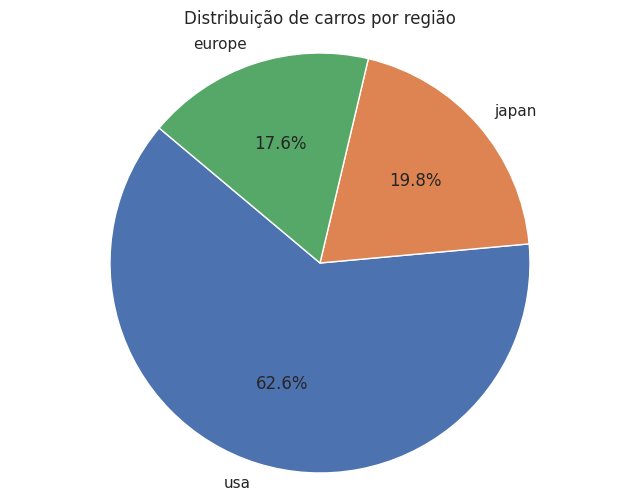

In [385]:
# Gera um gráfico pizza para observar a distribuição de carros pela origem

origin_counts = data['origin'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(origin_counts, labels=origin_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de carros por região')
plt.axis('equal')  
plt.show()

In [386]:
# Ocorrências na coluna Name

data['name'].value_counts()

name
ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
chevrolet chevette     4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s-10             1
Name: count, Length: 305, dtype: int64

In [387]:
# Ocorrências na coluna model_year

data['model_year'].value_counts()

model_year
73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: count, dtype: int64

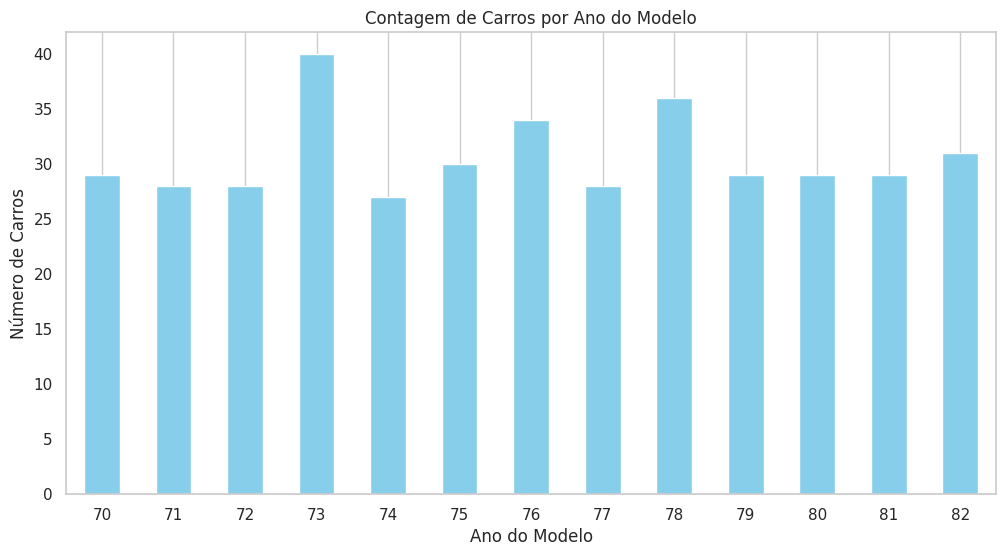

In [388]:
# Gera um gráfico em barras mostrando quantos veículos foram fabricados por ano

model_year_counts = data['model_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
model_year_counts.plot(kind='bar', color='skyblue')
plt.title('Contagem de Carros por Ano do Modelo')
plt.xlabel('Ano do Modelo')
plt.ylabel('Número de Carros')
plt.xticks(rotation=0)  
plt.grid(axis='y')
plt.show()

In [389]:
# Ocorrência na coluna Weight

data['weight'].value_counts()

weight
1985    4
2130    4
2125    3
2945    3
2265    3
       ..
2875    1
3102    1
3664    1
2807    1
2625    1
Name: count, Length: 351, dtype: int64

## Tabela de Correlação

In [390]:
# Seleciona as colunas numéricas
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calcula a matriz de correlação
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775396     -0.804203   -0.778427 -0.831741   
cylinders    -0.775396   1.000000      0.950721    0.842983  0.896017   
displacement -0.804203   0.950721      1.000000    0.897257  0.932824   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.831741   0.896017      0.932824    0.864538  1.000000   
acceleration  0.420289  -0.505419     -0.543684   -0.689196 -0.417457   
model_year    0.579267  -0.348746     -0.370164   -0.416361 -0.306564   

              acceleration  model_year  
mpg               0.420289    0.579267  
cylinders        -0.505419   -0.348746  
displacement     -0.543684   -0.370164  
horsepower       -0.689196   -0.416361  
weight           -0.417457   -0.306564  
acceleration      1.000000    0.288137  
model_year        0.288137    1.000000  


# Análise de Dados

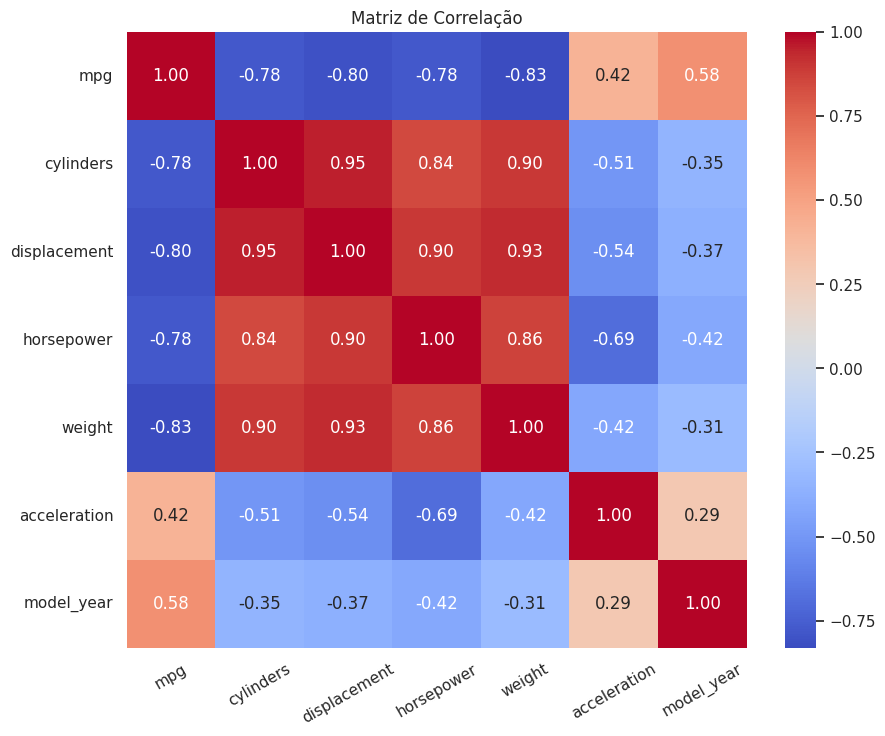

In [391]:
# matriz de correlação

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.xticks(rotation=30)
plt.show()

Relação Negativa com MPG:

* Cylinders: -0.775
* Displacement: -0.804
* Horsepower: -0.778
* Weight: -0.832
* Essas correlações negativas significam que, geralmente, conforme o número de cilindros, a cilindrada, a potência e o peso do carro aumentam, a eficiência de combustível (MPG) tende a diminuir.

Relações Altas entre Variáveis:
* Cylinders e Displacement: 0.951
* Displacement e Horsepower: 0.897
* Horsepower e Weight: 0.865
* Isso sugere que carros com mais cilindros também tendem a ter maior cilindrada e potência, além de serem mais pesados.

Relação com Aceleração e Ano do Modelo:
* Aceleração e MPG: 0.420
* Modelo e MPG: 0.579
* Isso indica que há uma relação positiva entre a aceleração e o ano do modelo com a eficiência de combustível. Carros mais novos e que aceleram melhor tendem a ter um MPG mais alto.

Correlação Fraca:
* A relação entre cylinders e model_year é negativa e moderada (-0.349), sugerindo que, em geral, carros mais novos tendem a ter menos cilindros.

## Relação entre MPG e Cilindrada

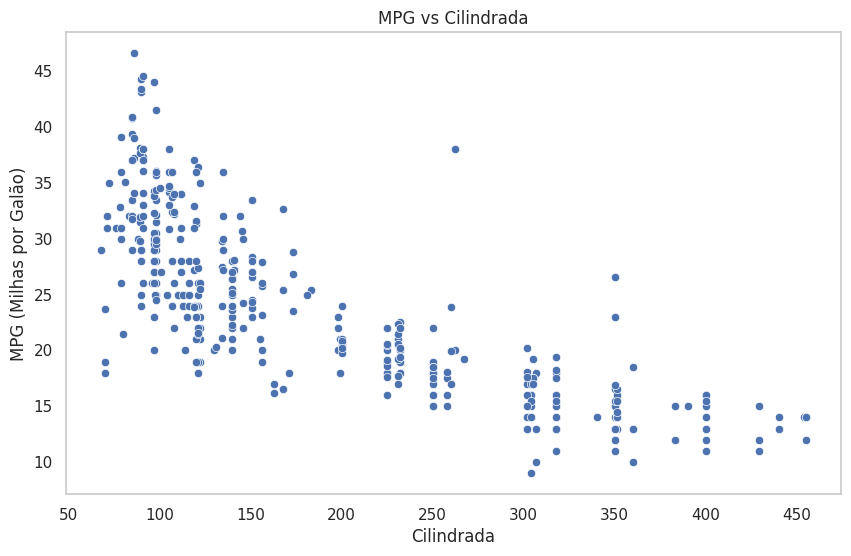

In [392]:
# Substitui valores infinitos por NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Gráfico de dispersão: MPG vs Cilindrada
plt.figure(figsize=(10, 6))
sns.scatterplot(x='displacement', y='mpg', data=data)
plt.title('MPG vs Cilindrada')
plt.xlabel('Cilindrada')
plt.ylabel('MPG (Milhas por Galão)')
plt.grid()
plt.show()

## Relação entre MPG e Peso

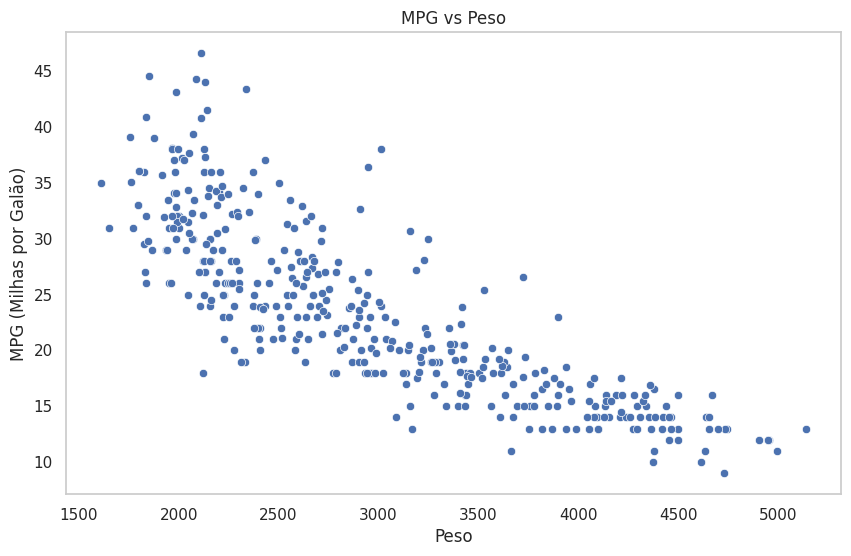

In [393]:
# Gráfico de dispersão: MPG vs Peso

plt.figure(figsize=(10, 6))
sns.scatterplot(x='weight', y='mpg', data=data)
plt.title('MPG vs Peso')
plt.xlabel('Peso')
plt.ylabel('MPG (Milhas por Galão)')
plt.grid()
plt.show()

## Relação entre MPG e Potência

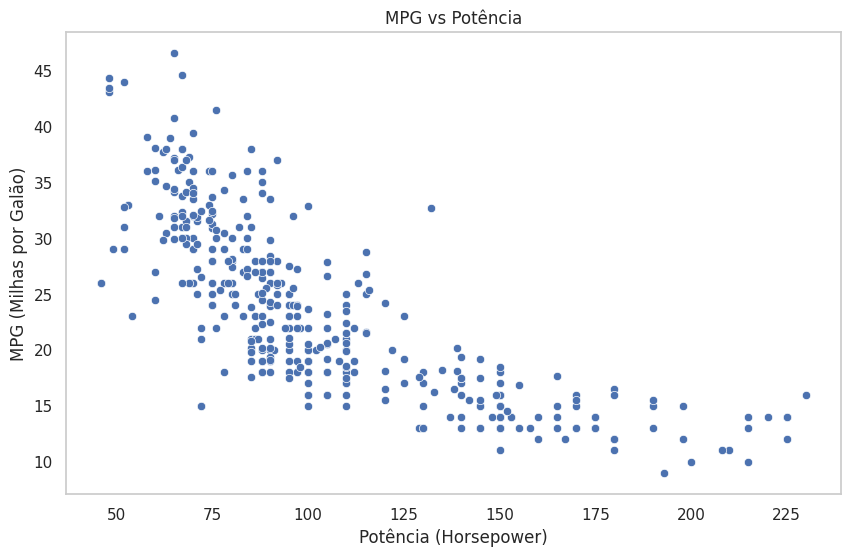

In [394]:
# Gráfico de dispersão: MPG vs Potência

plt.figure(figsize=(10, 6))
sns.scatterplot(x='horsepower', y='mpg', data=data)
plt.title('MPG vs Potência')
plt.xlabel('Potência (Horsepower)')
plt.ylabel('MPG (Milhas por Galão)')
plt.grid()
plt.show()

## Carros mais vendidos por origem

In [395]:
# Conta os carros por origem

car_count = data.groupby(['origin', 'name']).size().reset_index(name='count')

In [396]:
# Identifica os mais vendidos

top_selling_cars = car_count.sort_values(by=['origin', 'count'], ascending=[True, False])
top_n = top_selling_cars.groupby('origin').head(5)

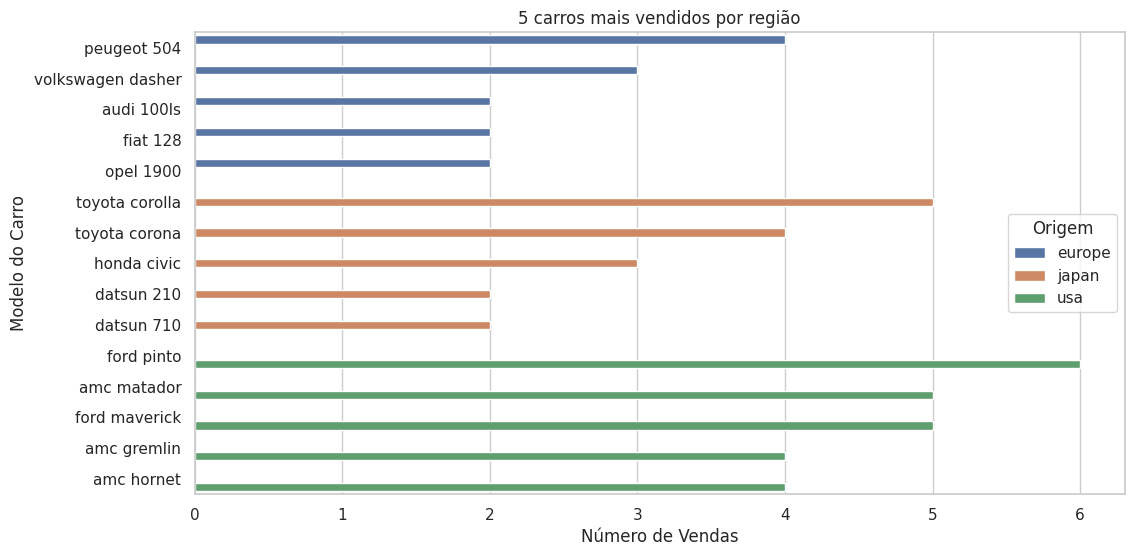

In [397]:
# Visualização dos Resultados

plt.figure(figsize=(12, 6))
sns.barplot(data=top_n, x='count', y='name', hue='origin')
plt.title('5 carros mais vendidos por região')
plt.xlabel('Número de Vendas')
plt.ylabel('Modelo do Carro')
plt.legend(title='Origem')
plt.show()

## Cilindrada e Potência

In [398]:
# Calcula a correlação
correlation = data[['displacement', 'horsepower']].corr()
print(correlation)

              displacement  horsepower
displacement      1.000000    0.897257
horsepower        0.897257    1.000000


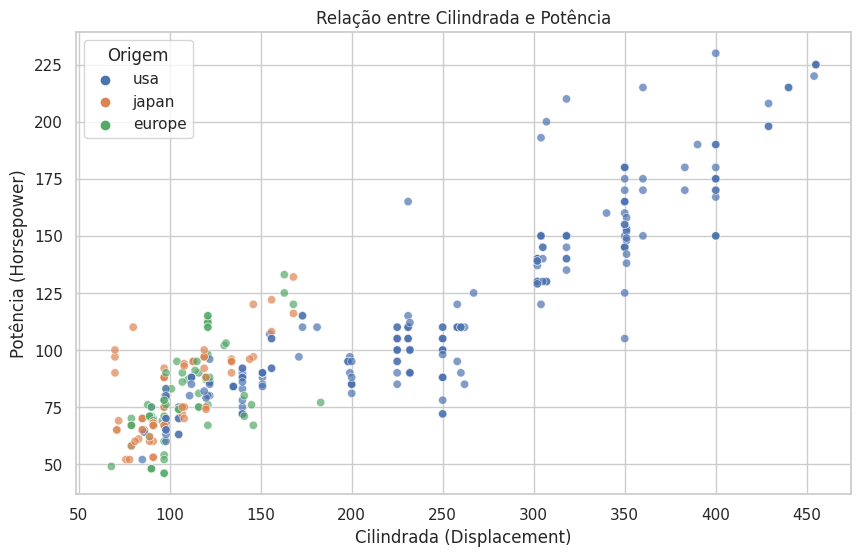

In [399]:
# Visualiza a correlação com um gráfico de dispersão

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='displacement', y='horsepower', hue='origin', alpha=0.7)
plt.title('Relação entre Cilindrada e Potência')
plt.xlabel('Cilindrada (Displacement)')
plt.ylabel('Potência (Horsepower)')
plt.legend(title='Origem')
plt.show()

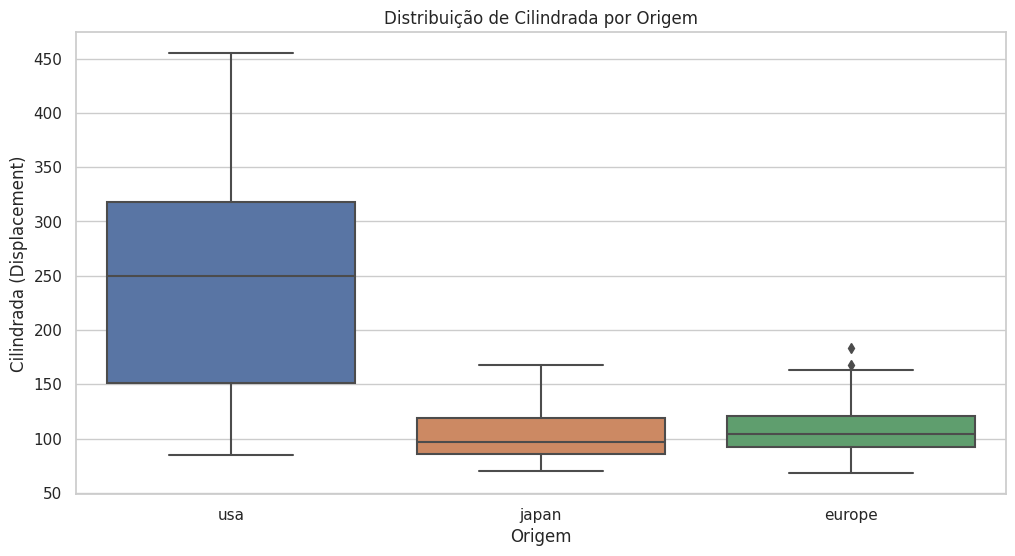

In [400]:
# Box plot para cilindrada

plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='origin', y='displacement')
plt.title('Distribuição de Cilindrada por Origem')
plt.xlabel('Origem')
plt.ylabel('Cilindrada (Displacement)')
plt.show()

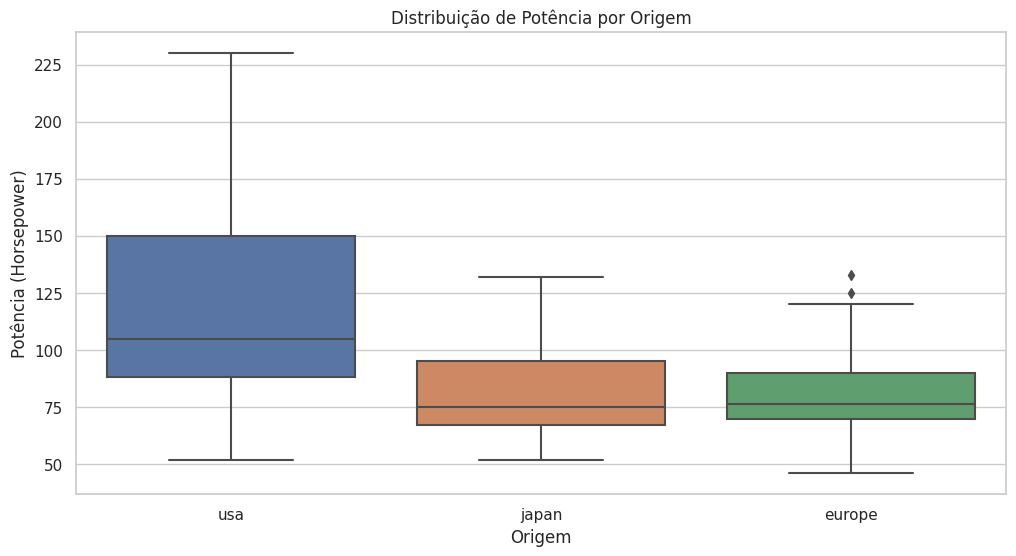

In [401]:
# Box plot para Potência

plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='origin', y='horsepower')
plt.title('Distribuição de Potência por Origem')
plt.xlabel('Origem')
plt.ylabel('Potência (Horsepower)')
plt.show()

## Numero de Carros por Origem

In [402]:
# Contar o número de carros por região

car_count_by_origin = data['origin'].value_counts()

# Exibir os resultados
print(car_count_by_origin)

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64


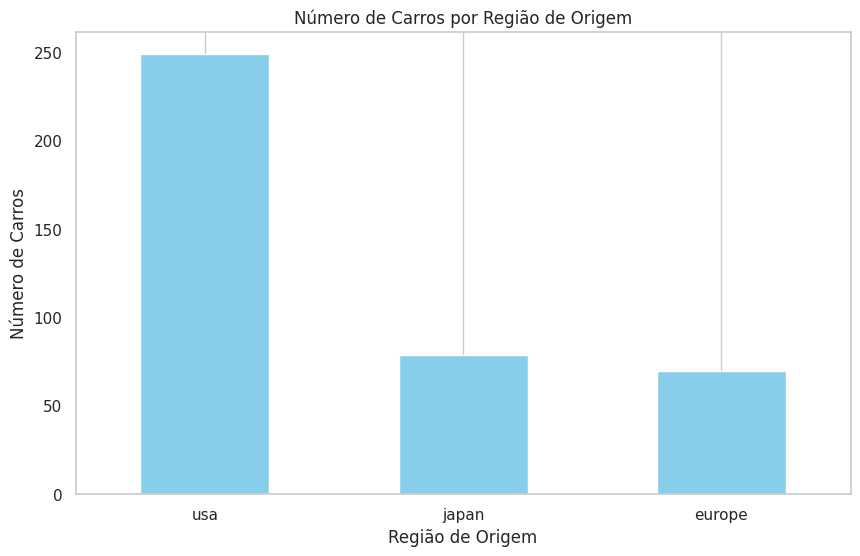

In [403]:
# Cria um grafico de barras

plt.figure(figsize=(10, 6))
car_count_by_origin.plot(kind='bar', color='skyblue')
plt.title('Número de Carros por Região de Origem')
plt.xlabel('Região de Origem')
plt.ylabel('Número de Carros')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

* Dominância dos EUA: A maioria dos carros no seu conjunto de dados é fabricada nos Estados Unidos, com uma quantidade significativamente maior em comparação às outras regiões.

* Produção no Japão e Europa: O Japão e a Europa têm uma produção consideravelmente menor.

# Aplicação de Modelos

-----


## Regressão Linear

In [404]:
# Seleciona variáveis
X = data_cleaned[['displacement', 'horsepower', 'weight']]
y = data_cleaned['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Cria e treina o modelo
model_reg = LinearRegression()
model_reg.fit(X_train, y_train)

LinearRegression()

In [405]:
# Faz previsões
y_pred = model_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = model_reg.score(X_test, y_test) * 100

print(f'MSE: {mse}')
print(f'R² Score: {r2}')
print(f'Accuracy: {accuracy:.2f}%')

MSE: 18.668908740663714
R² Score: 0.6471227898347742
Accuracy: 64.71%


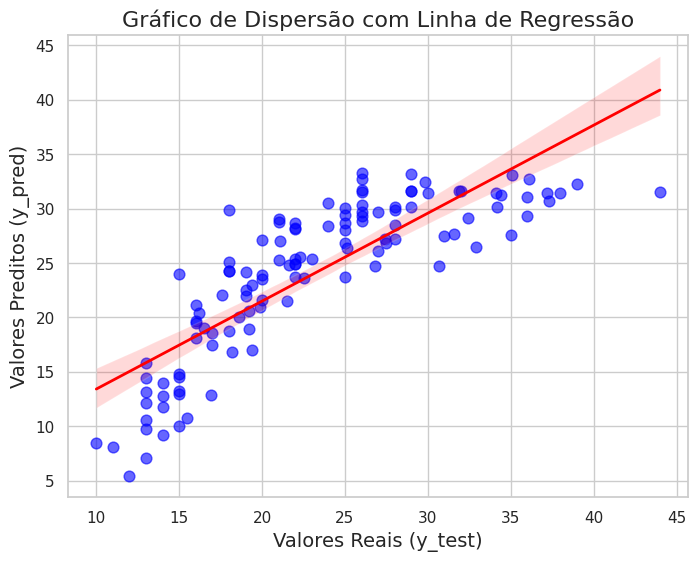

In [406]:
# Criação do gráfico de dispersão com a linha de regressão
sns.set(style="whitegrid")

plt.figure(figsize=(8,6))

# Criando o gráfico de dispersão com a linha de regressão 
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 60, 'color': 'blue', 'alpha': 0.6}, line_kws={'color': 'red', 'linewidth': 2})

plt.title('Gráfico de Dispersão com Linha de Regressão', fontsize=16)
plt.xlabel('Valores Reais (y_test)', fontsize=14)
plt.ylabel('Valores Preditos (y_pred)', fontsize=14)

# Exibindo o gráfico
plt.show()

In [407]:
X_train_sm = sm.add_constant(X_train)  # Adiciona uma coluna de 1's para o intercepto

# Cria e ajusta o modelo com statsmodels
model_sm = sm.OLS(y_train, X_train_sm)  # OLS: Ordinary Least Squares (Mínimos Quadrados Ordinários)
results_sm = model_sm.fit()

# Exibi o sumário detalhado
print(results_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     234.0
Date:                Tue, 19 Nov 2024   Prob (F-statistic):           8.99e-75
Time:                        18:01:39   Log-Likelihood:                -783.13
No. Observations:                 274   AIC:                             1574.
Df Residuals:                     270   BIC:                             1589.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           45.5286      1.432     31.794   

In [408]:
X = data_cleaned[['displacement', 'horsepower', 'weight']]
y = data_cleaned['mpg']

data_combined = pd.concat([X, y], axis=1)

# Calcula o z-score para identificar outliers
z_scores = np.abs(zscore(data_combined))
threshold = 3
outliers = (z_scores > threshold).any(axis=1)

# Remove os outliers
data_no_outliers = data_combined[~outliers]
X_no_outliers = data_no_outliers[['displacement', 'horsepower', 'weight']]
y_no_outliers = data_no_outliers['mpg']

# Divide os dados em treino e teste novamente
X_train, X_test, y_train, y_test = train_test_split(X_no_outliers, y_no_outliers, test_size=0.3, random_state=42)

# Cria e treina o modelo de regressão linear
model_reg = LinearRegression()
model_reg.fit(X_train, y_train)

# Faz previsões e avalia o modelo
y_pred = model_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = model_reg.score(X_test, y_test) * 100

print(f"Resultados após a remoção de outliers:")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Accuracy: {accuracy:.2f}%")

Resultados após a remoção de outliers:
MSE: 18.08
R² Score: 0.69
Accuracy: 69.40%


## Árvore de Decisão

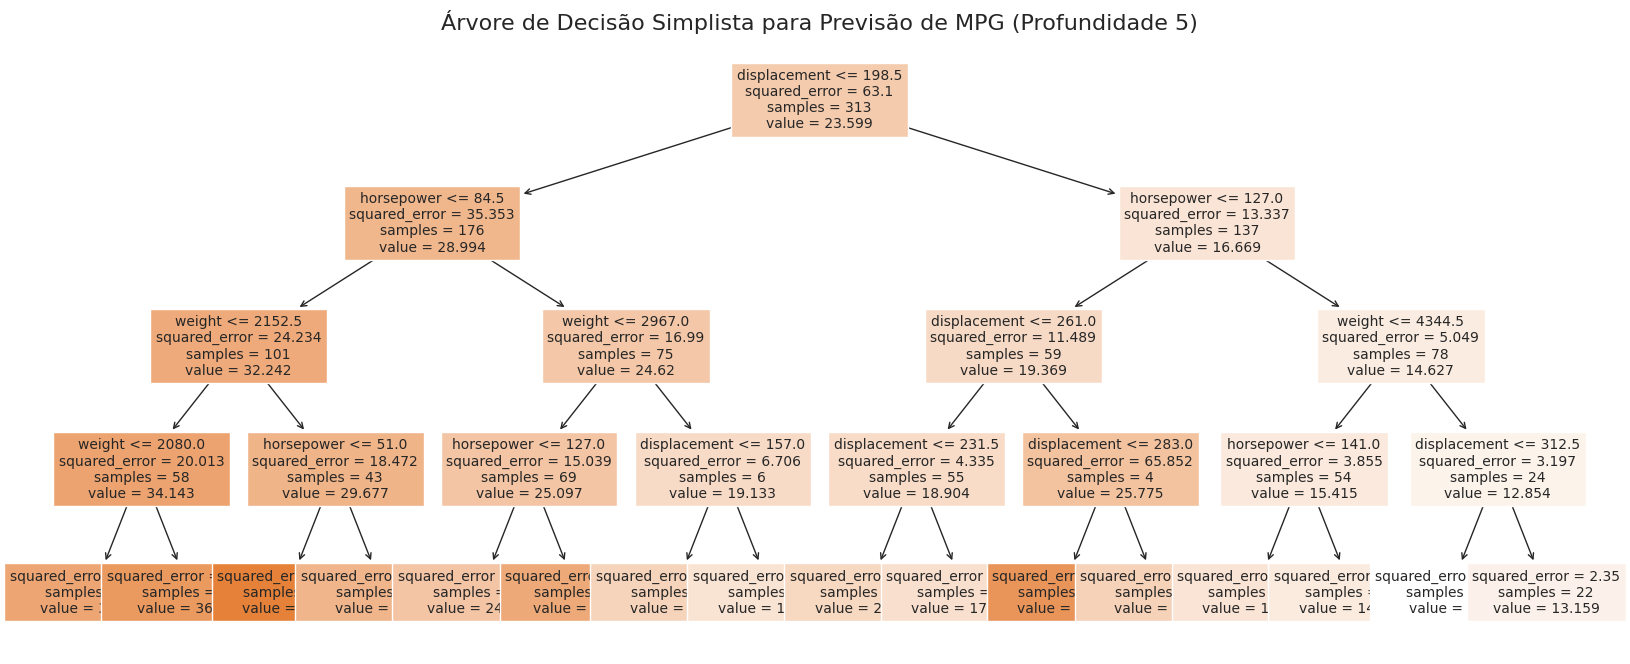

Mean Squared Error: 26.670057856499614
R² Score: 0.47747348945517376
Accuracy: 47.75%


In [409]:
X = data_cleaned[['displacement', 'horsepower', 'weight']]
y = data_cleaned['mpg']

# Dividi os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cria e treina o modelo de árvore de decisão com profundidade limitada a 5
model_tree = DecisionTreeRegressor(max_depth=4, random_state=42)
model_tree.fit(X_train, y_train)

# Prever os valores no conjunto de teste
y_pred = model_tree.predict(X_test)

# Visualizando a árvore de decisão
plt.figure(figsize=(20, 8))
plot_tree(model_tree, filled=True, feature_names=X.columns, fontsize=10)
plt.title("Árvore de Decisão Simplista para Previsão de MPG (Profundidade 5)", fontsize=16)
plt.show()

# Exibi o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = model_tree.score(X_test, y_test) * 100

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')
print(f'Accuracy: {accuracy:.2f}%')

Mean Squared Error: 25.25948317328432
R² Score: 0.5051098249685493


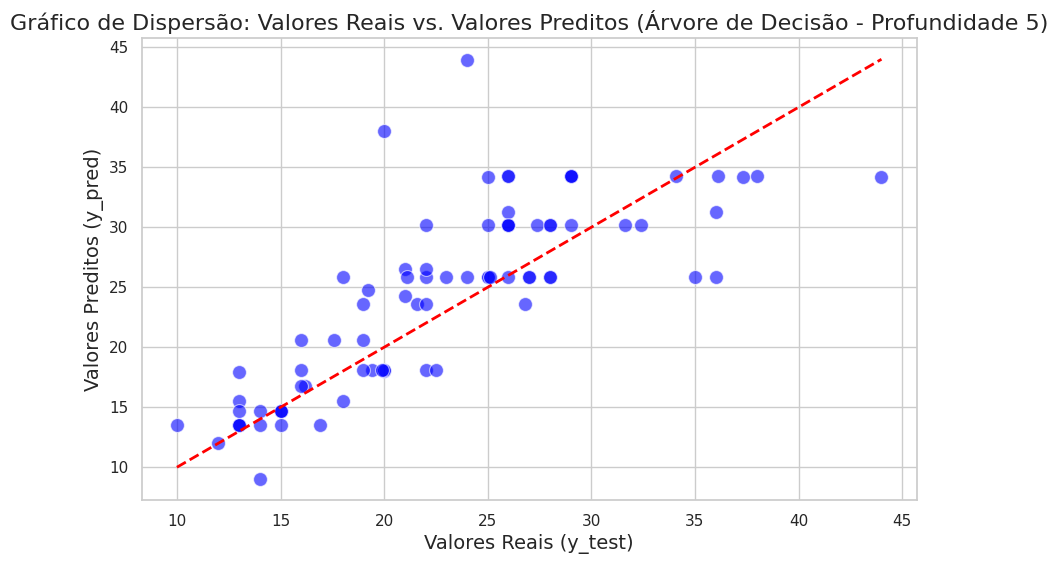

In [410]:
X = data_cleaned[['displacement', 'horsepower', 'weight']]
y = data_cleaned['mpg']

# Dividi os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cria e treina o modelo de árvore de decisão com profundidade limitada a 5
model_tree = DecisionTreeRegressor(max_depth=5, random_state=42)
model_tree.fit(X_train, y_train)

y_pred = model_tree.predict(X_test)

# Calcula o MSE e R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Exibi o desempenho do modelo
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

# Criando o gráfico de dispersão para comparar os valores reais e previstos
plt.figure(figsize=(10, 6))

# Gráfico de dispersão: valores reais (y_test) vs valores preditos (y_pred)
sns.scatterplot(x=y_test, y=y_pred, color='blue', s=100, alpha=0.6)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)

plt.title('Gráfico de Dispersão: Valores Reais vs. Valores Preditos (Árvore de Decisão - Profundidade 5)', fontsize=16)
plt.xlabel('Valores Reais (y_test)', fontsize=14)
plt.ylabel('Valores Preditos (y_pred)', fontsize=14)

# Exibi o gráfico
plt.show()

In [411]:
# Calcula o IQR para cada variável
Q1 = data_cleaned[['displacement', 'horsepower', 'weight', 'mpg']].quantile(0.25)
Q3 = data_cleaned[['displacement', 'horsepower', 'weight', 'mpg']].quantile(0.75)
IQR = Q3 - Q1

# Identifica outliers para cada variável
outliers = ((data_cleaned[['displacement', 'horsepower', 'weight', 'mpg']] < (Q1 - 1.5 * IQR)) |
            (data_cleaned[['displacement', 'horsepower', 'weight', 'mpg']] > (Q3 + 1.5 * IQR)))

# Mostra os outliers
outliers_data = data_cleaned[outliers.any(axis=1)]  # Linhas que têm pelo menos um outlier
print(f'Outliers detectados: {outliers_data.shape[0]}')
print(outliers_data.head())


Outliers detectados: 10
                       name   mpg  cylinders  displacement  horsepower  \
6          chevrolet impala  14.0          8         454.0       220.0   
7         plymouth fury iii  14.0          8         440.0       215.0   
8          pontiac catalina  14.0          8         455.0       225.0   
13  buick estate wagon (sw)  14.0          8         455.0       225.0   
25                ford f250  10.0          8         360.0       215.0   

    weight  acceleration  model_year origin  
6     4354           9.0          70    usa  
7     4312           8.5          70    usa  
8     4425          10.0          70    usa  
13    3086          10.0          70    usa  
25    4615          14.0          70    usa  


In [412]:
# Calcula o IQR (Intervalo Interquartil) para cada variável
Q1 = data_cleaned[['displacement', 'horsepower', 'weight', 'mpg']].quantile(0.25)
Q3 = data_cleaned[['displacement', 'horsepower', 'weight', 'mpg']].quantile(0.75)
IQR = Q3 - Q1

# Identifica outliers com base no IQR
outliers = ((data_cleaned[['displacement', 'horsepower', 'weight', 'mpg']] < (Q1 - 1.5 * IQR)) |
            (data_cleaned[['displacement', 'horsepower', 'weight', 'mpg']] > (Q3 + 1.5 * IQR)))

# Obter os índices dos outliers
outliers_indices = outliers[outliers.any(axis=1)].index

# Remove os outliers
data_cleaned_filtered = data_cleaned.drop(outliers_indices)

# Verifica o número de registros após a remoção dos outliers
print(f'Número de registros após remoção dos outliers: {data_cleaned_filtered.shape[0]}')


Número de registros após remoção dos outliers: 382


In [413]:
# Dividi os dados filtrados em treino e teste
X = data_cleaned_filtered[['displacement', 'horsepower', 'weight']]
y = data_cleaned_filtered['mpg']

# Dividi em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualiza as formas dos conjuntos de treino e teste
print(f'Tamanho do conjunto de treino: {X_train.shape[0]}')
print(f'Tamanho do conjunto de teste: {X_test.shape[0]}')


Tamanho do conjunto de treino: 305
Tamanho do conjunto de teste: 77


In [414]:
# Cria e treina o modelo de árvore de decisão
model_tree = DecisionTreeRegressor(max_depth=5, random_state=42)
model_tree.fit(X_train, y_train)

# Faz previsões no conjunto de teste
y_pred_filtered = model_tree.predict(X_test)

In [415]:
# Calcula o MSE e o R² para o modelo após remoção dos outliers
mse_filtered = mean_squared_error(y_test, y_pred_filtered)
r2_filtered = r2_score(y_test, y_pred_filtered)
accuracy = model_tree.score(X_test, y_test) * 100

# Exibi as métricas de desempenho
print(f'Mean Squared Error após remoção dos outliers: {mse_filtered}')
print(f'R² Score após remoção dos outliers: {r2_filtered}')
print(f'Accuracy após remoção dos outliers: {accuracy:.2f}%')

Mean Squared Error após remoção dos outliers: 14.162038389910148
R² Score após remoção dos outliers: 0.7706560568342373
Accuracy após remoção dos outliers: 77.07%


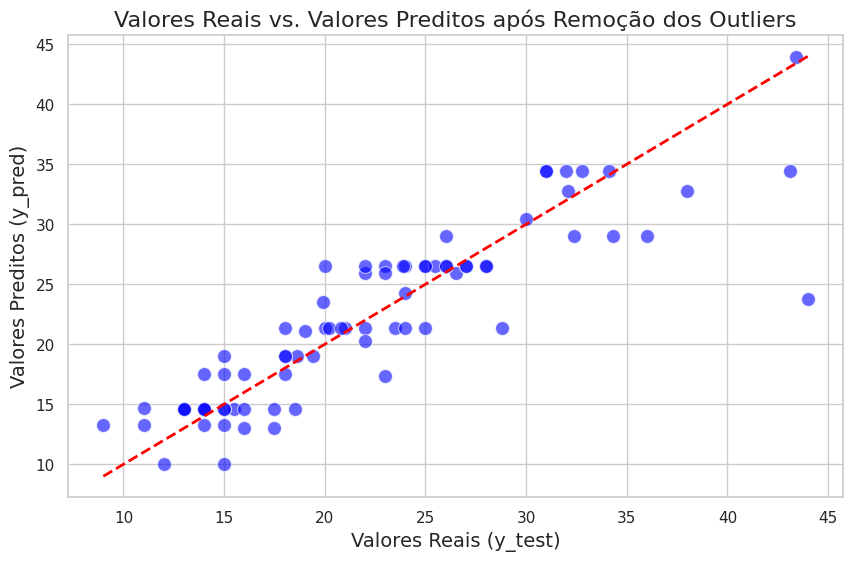

In [416]:
# Cria o gráfico de dispersão com valores reais vs. valores previstos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_filtered, color='blue', s=100, alpha=0.6)

# Plota a linha de identidade (y = x) para comparar os valores reais e previstos
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)

plt.title('Valores Reais vs. Valores Preditos após Remoção dos Outliers', fontsize=16)
plt.xlabel('Valores Reais (y_test)', fontsize=14)
plt.ylabel('Valores Preditos (y_pred)', fontsize=14)

# Exibi o gráfico
plt.show()


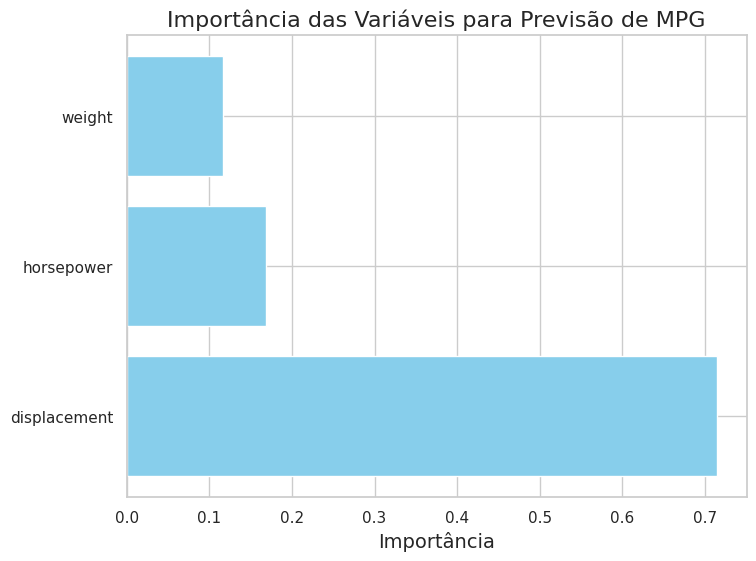

In [417]:
# Obtem a importância das variáveis
importances = model_tree.feature_importances_

# Ordena as importâncias em ordem decrescente
indices = np.argsort(importances)[::-1]

# Plota a importância das variáveis
plt.figure(figsize=(8, 6))
plt.barh(X.columns[indices], importances[indices], color='skyblue')
plt.xlabel('Importância', fontsize=14)
plt.title('Importância das Variáveis para Previsão de MPG', fontsize=16)
plt.show()

## Random Forest

Accuracy: 67.48%



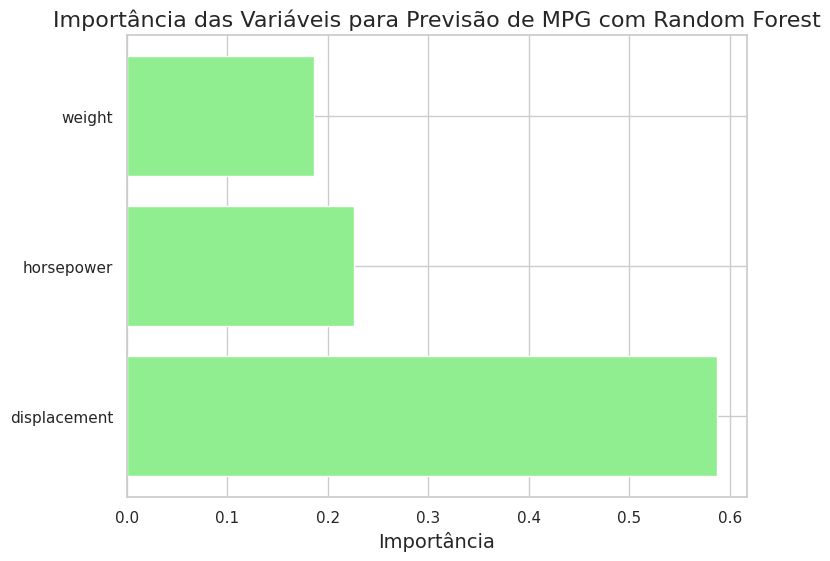

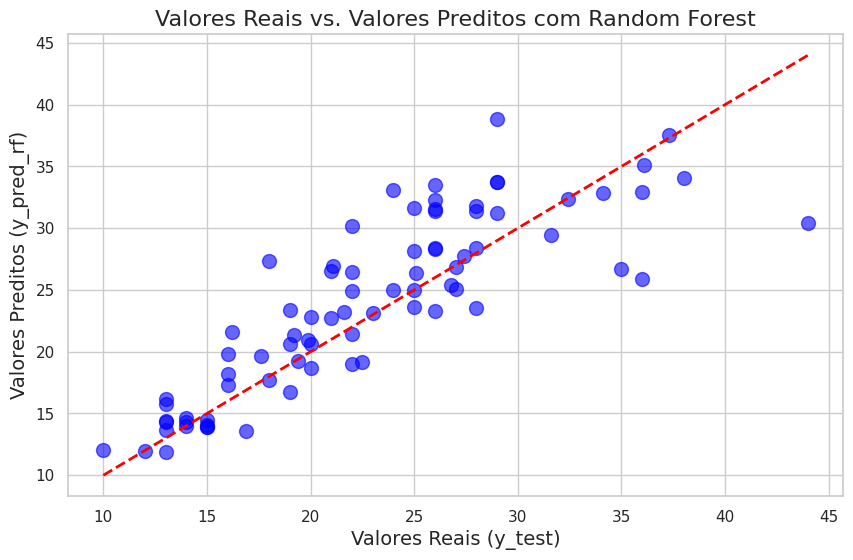

In [418]:
# Dividi os dados em variáveis x e y
X = data_cleaned[['displacement', 'horsepower', 'weight']]
y = data_cleaned['mpg']

# Dividi os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cria o modelo de Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Treina o modelo
model_rf.fit(X_train, y_train)

# Faz previsões no conjunto de teste
y_pred_rf = model_rf.predict(X_test)

# Avalia o desempenho do modelo

# Calcula a acuracia
accuracy_rf = model_rf.score(X_test, y_test) * 100

print(f'Accuracy: {accuracy_rf:.2f}%\n')

# Visualiza a importância das variáveis
importances_rf = model_rf.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]

# Plota a importância das variáveis
plt.figure(figsize=(8, 6))
plt.barh(X.columns[indices_rf], importances_rf[indices_rf], color='lightgreen')
plt.xlabel('Importância', fontsize=14)
plt.title('Importância das Variáveis para Previsão de MPG com Random Forest', fontsize=16)
plt.show()

# Gráfico de dispersão - Valores reais vs. Valores previstos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', s=100, alpha=0.6)

# Plota a linha de identidade (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)

plt.title('Valores Reais vs. Valores Preditos com Random Forest', fontsize=16)
plt.xlabel('Valores Reais (y_test)', fontsize=14)
plt.ylabel('Valores Preditos (y_pred_rf)', fontsize=14)
plt.show()

In [419]:
X = data_cleaned[['displacement', 'horsepower', 'weight']]
y = data_cleaned['mpg']

data_combined = pd.concat([X, y], axis=1)

# Identifica outliers usando z-score
z_scores = np.abs(zscore(data_combined))
threshold = 3
outliers = (z_scores > threshold).any(axis=1)

# Remove os outliers
data_no_outliers = data_combined[~outliers]
X_no_outliers = data_no_outliers[['displacement', 'horsepower', 'weight']]
y_no_outliers = data_no_outliers['mpg']

# Divide os dados sem outliers
X_train, X_test, y_train, y_test = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)

# Cria o modelo de Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Treina o modelo
model_rf.fit(X_train, y_train)

# Faz previsões
y_pred_rf = model_rf.predict(X_test)

# Avaliação do modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
accuracy_rf = model_rf.score(X_test, y_test) * 100

# Resultados
print("Resultados após a remoção de outliers:")
print(f"MSE: {mse_rf:.2f}")
print(f"R²: {r2_rf:.2f}")
print(f"Acurácia: {accuracy_rf:.2f}%")

Resultados após a remoção de outliers:
MSE: 14.08
R²: 0.73
Acurácia: 73.28%


Erro Médio: -0.6165
Erro Absoluto Médio (MAE): 2.6967
Erro Quadrático Médio (MSE): 14.0834
Raiz do Erro Quadrático Médio (RMSE): 3.7528
Erro Máximo: 12.7410
Erro Mínimo: -9.1180
Desvio Padrão dos Erros: 3.7018

Top 5 maiores erros:
394    12.741
357     8.863
298     7.186
343     6.058
335     5.985
Name: mpg, dtype: float64

Top 5 menores erros:
119   -9.118
60    -9.026
77    -8.218
147   -7.055
80    -6.150
Name: mpg, dtype: float64


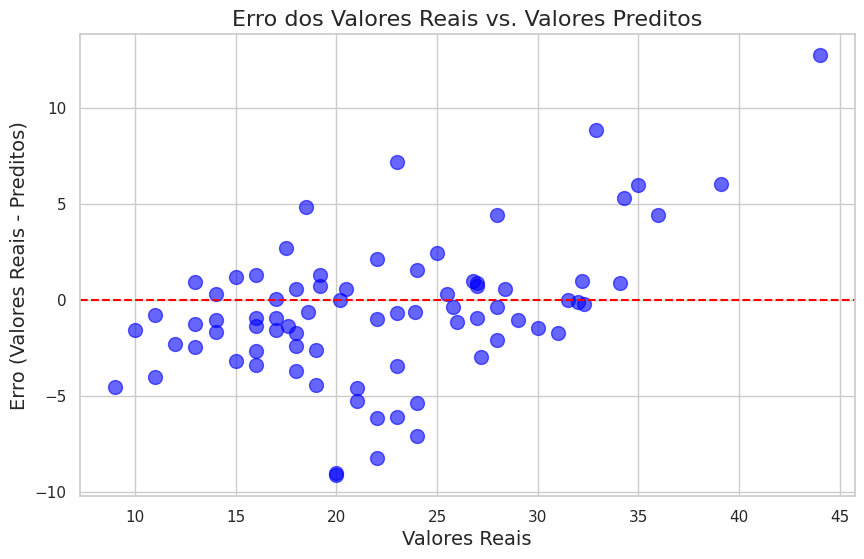

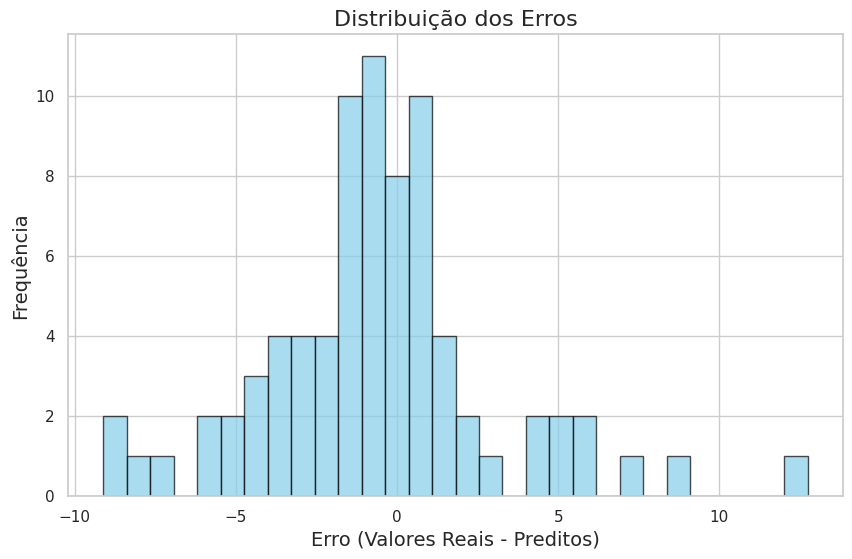

In [420]:
# Calcula o erro
errors = y_test - y_pred_rf

# Estatísticas básicas sobre os erros
mean_error = np.mean(errors)
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
max_error = np.max(errors)
min_error = np.min(errors)
std_error = np.std(errors)

# Exibindo os detalhes sobre os erros
print(f"Erro Médio: {mean_error:.4f}")
print(f"Erro Absoluto Médio (MAE): {mae:.4f}")
print(f"Erro Quadrático Médio (MSE): {mse:.4f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.4f}")
print(f"Erro Máximo: {max_error:.4f}")
print(f"Erro Mínimo: {min_error:.4f}")
print(f"Desvio Padrão dos Erros: {std_error:.4f}")

# Identifica as 5 maiores diferenças de erro
top_5_errors = errors.nlargest(5)
print("\nTop 5 maiores erros:")
print(top_5_errors)

# Identifica as 5 menores diferenças de erro
bottom_5_errors = errors.nsmallest(5)
print("\nTop 5 menores erros:")
print(bottom_5_errors)

# Plota o erro (diferença entre valores reais e previstos)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, errors, color='blue', s=100, alpha=0.6)

# Adiciona uma linha horizontal em zero
plt.axhline(0, color='red', linestyle='--')

plt.title('Erro dos Valores Reais vs. Valores Preditos', fontsize=16)
plt.xlabel('Valores Reais', fontsize=14)
plt.ylabel('Erro (Valores Reais - Preditos)', fontsize=14)
plt.show()

# Histograma dos erros para avaliar a distribuição
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribuição dos Erros', fontsize=16)
plt.xlabel('Erro (Valores Reais - Preditos)', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.show()


## KNN

In [421]:
# Cria o modelo KNN com 7 vizinhos
knn_model = KNeighborsRegressor(n_neighbors=7)

# Treina o modelo
knn_model.fit(X_train, y_train)

# Prever os valores no conjunto de teste
y_pred_knn = knn_model.predict(X_test)

In [422]:
# Avalia a performance do modelo
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
accuracy_knn = knn_model.score(X_test, y_test) * 100

# mostra a acuracia
print(f'Accuracy: {accuracy_knn:.2f}%')

Accuracy: 66.34%


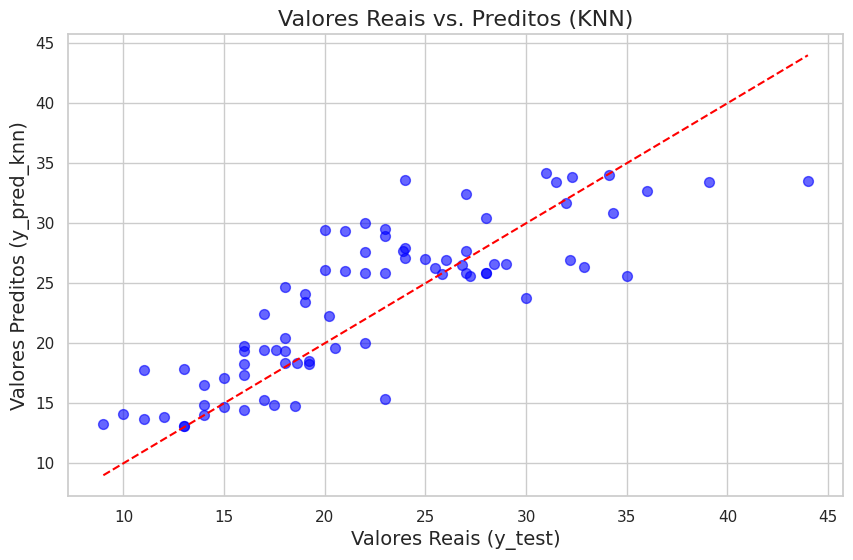

In [423]:
# Plota os valores reais vs previstos para o KNN
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn, color='blue', s=50, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Linha ideal de 45 graus
plt.title('Valores Reais vs. Preditos (KNN)', fontsize=16)
plt.xlabel('Valores Reais (y_test)', fontsize=14)
plt.ylabel('Valores Preditos (y_pred_knn)', fontsize=14)
plt.show()

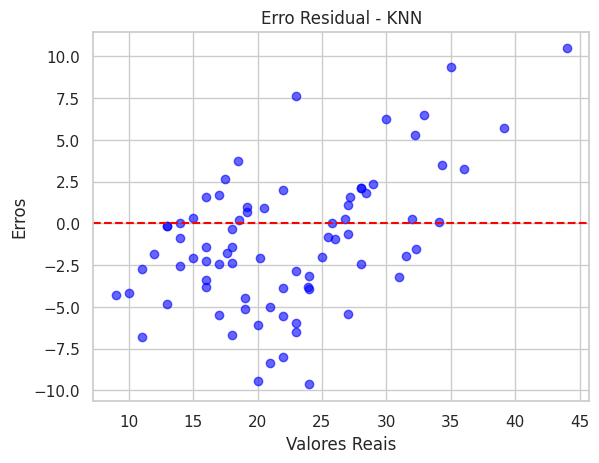

In [424]:
# Erro residual (diferença entre valores reais e previstos)
errors = y_test - y_pred_knn

# Plotando o gráfico de erro residual
plt.scatter(y_test, errors, color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Reais')
plt.ylabel('Erros')
plt.title('Erro Residual - KNN')
plt.show()

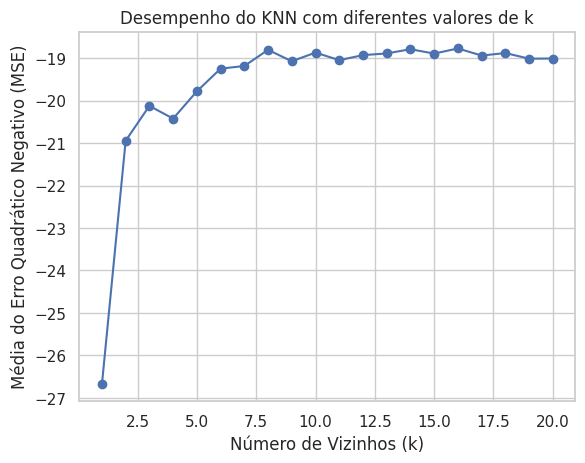

In [425]:
# Testa diferentes valores de k (número de vizinhos)
k_values = range(1, 21)
mean_scores = []

for k in k_values:
    model_knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(model_knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_scores.append(scores.mean())

# Plota a performance do modelo com diferentes valores de k
plt.plot(k_values, mean_scores, marker='o')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Média do Erro Quadrático Negativo (MSE)')
plt.title('Desempenho do KNN com diferentes valores de k')
plt.show()

In [426]:
X = data_cleaned[['displacement', 'horsepower', 'weight']]
y = data_cleaned['mpg']

data_combined = pd.concat([X, y], axis=1)

# calcula o z-score para identificar outliers
z_scores = np.abs(zscore(data_combined))
threshold = 3
outliers = (z_scores > threshold).any(axis=1)

# Remove os outliers
data_cleaned_no_outliers = data_combined[~outliers]
X_no_outliers = data_cleaned_no_outliers[['displacement', 'horsepower', 'weight']]
y_no_outliers = data_cleaned_no_outliers['mpg']

# Divide os dados em treino e teste novamente
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(
    X_no_outliers, y_no_outliers, test_size=0.3, random_state=42
)

# Cria e treina o modelo KNN sem outliers
knn_model_no_outliers = KNeighborsRegressor(n_neighbors=7)
knn_model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)

# Previsão e avaliação
y_pred_knn_no_outliers = knn_model_no_outliers.predict(X_test_no_outliers)

mae_knn_no_outliers = mean_absolute_error(y_test_no_outliers, y_pred_knn_no_outliers)
mse_knn_no_outliers = mean_squared_error(y_test_no_outliers, y_pred_knn_no_outliers)
r2_knn_no_outliers = r2_score(y_test_no_outliers, y_pred_knn_no_outliers)
accuracy_knn_no_outliers = knn_model_no_outliers.score(X_test_no_outliers, y_test_no_outliers) * 100

print("Resultados após a remoção de outliers:")
print(f"MAE: {mae_knn_no_outliers:.2f}")
print(f"MSE: {mse_knn_no_outliers:.2f}")
print(f"R²: {r2_knn_no_outliers:.2f}")
print(f"Accuracy: {accuracy_knn_no_outliers:.2f}%")

Resultados após a remoção de outliers:
MAE: 3.36
MSE: 18.28
R²: 0.69
Accuracy: 69.07%


## Redes Neurais (MPL)

In [427]:
X = data_cleaned[['displacement', 'horsepower', 'weight']]  # Variáveis independentes
y = data_cleaned['mpg']  # Variável dependente (target)

# Dividi os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliza os dados (MLP é sensível à escala das variáveis)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [428]:
# Cria o modelo MLP
mlp_model = MLPRegressor(hidden_layer_sizes=(50,), max_iter=2000, random_state=42)

# Treina o modelo com os dados de treino
mlp_model.fit(X_train_scaled, y_train)

MLPRegressor(hidden_layer_sizes=(50,), max_iter=2000, random_state=42)

In [429]:
# Faz previsões no conjunto de teste
y_pred_mlp = mlp_model.predict(X_test_scaled)

# Avalia o desempenho do modelo
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)
accuracy_mlp = mlp_model.score(X_test_scaled, y_test)

# exibi a acuracia
print(f'Acurácia do MLP: {accuracy_mlp * 100:.2f}%')

Acurácia do MLP: 68.53%


In [430]:
X = data_cleaned[['displacement', 'horsepower', 'weight']]
y = data_cleaned['mpg']

data_combined = pd.concat([X, y], axis=1)

# Identifica outliers usando z-score
z_scores = np.abs(zscore(data_combined))
threshold = 3
outliers = (z_scores > threshold).any(axis=1)

# Remove os outliers
data_no_outliers = data_combined[~outliers]
X_no_outliers = data_no_outliers[['displacement', 'horsepower', 'weight']]
y_no_outliers = data_no_outliers['mpg']

# Divisão dos dados sem outliers
X_train, X_test, y_train, y_test = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)

# Normalização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treina o modelo MLP sem outliers
mlp_model = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42)
mlp_model.fit(X_train_scaled, y_train)

# Faz previsões e avalia o modelo
y_pred_mlp = mlp_model.predict(X_test_scaled)

mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)
accuracy_mlp = mlp_model.score(X_test_scaled, y_test)

# Exibe os resultados
print(f"Avaliação do MLP sem outliers:")
print(f"MAE: {mae_mlp:.2f}")
print(f"MSE: {mse_mlp:.2f}")
print(f"R²: {r2_mlp:.2f}")
print(f"Acurácia: {accuracy_mlp * 100:.2f}%")

Avaliação do MLP sem outliers:
MAE: 2.94
MSE: 14.24
R²: 0.73
Acurácia: 72.98%


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


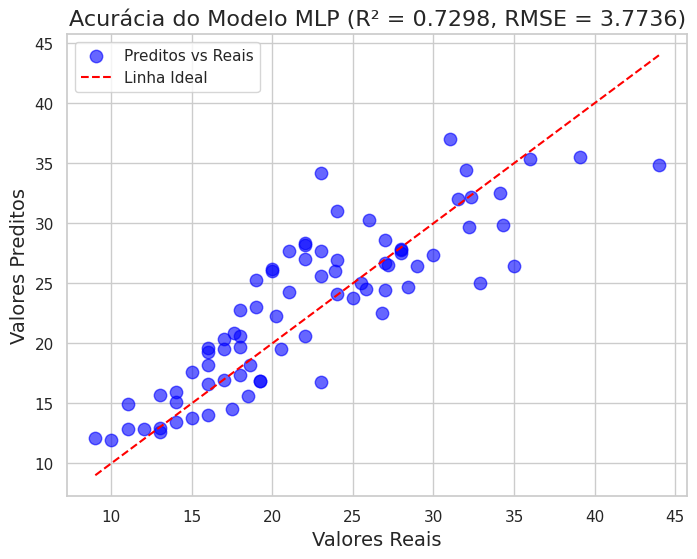

In [431]:
# Calcula o R² (coeficiente de determinação)
r2_mlp = r2_score(y_test, y_pred_mlp)

# Calcula o erro quadrático médio (RMSE)
rmse_mlp = mean_squared_error(y_test, y_pred_mlp, squared=False)

# Plotando a comparação entre os valores reais e previstos
plt.figure(figsize=(8, 6))

# Gráfico de dispersão dos valores reais vs. valores previstos
plt.scatter(y_test, y_pred_mlp, color='blue', alpha=0.6, s=80, label='Preditos vs Reais')

# Linha de 45 graus (onde os valores reais são iguais aos previstos)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Linha Ideal")
plt.title(f'Acurácia do Modelo MLP (R² = {r2_mlp:.4f}, RMSE = {rmse_mlp:.4f})', fontsize=16)
plt.xlabel('Valores Reais', fontsize=14)
plt.ylabel('Valores Preditos', fontsize=14)
plt.legend()

# Exibi o gráfico
plt.show()

In [432]:
# Calcula R² (coeficiente de determinação)
r2 = r2_score(y_test, y_pred_mlp)

# Calcula o erro absoluto médio (MAE)
mae = mean_absolute_error(y_test, y_pred_mlp)

# Exibi as métricas
print(f'R² (Acurácia) do MLP: {r2:.4f}')
print(f'Erro Absoluto Médio (MAE) do MLP: {mae:.4f}')

R² (Acurácia) do MLP: 0.7298
Erro Absoluto Médio (MAE) do MLP: 2.9396
